In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from datetime import datetime


import seaborn as sns

In [2]:
dateBegin1 = '2024-04-14 00'
dateEnd1 = '2024-04-15 00'
dateBegin1_obj = datetime.strptime(dateBegin1, '%Y-%m-%d %H')
dateBegin1_str = dateBegin1_obj.strftime('%Y-%m-%d %H:%M')

dateEnd1_obj = datetime.strptime(dateEnd1, '%Y-%m-%d %H')
dateEnd1_str = dateEnd1_obj.strftime('%Y-%m-%d %H:%M')
file1 = 'downlink_receiver.csv'
df1 = pd.read_csv(file1)
df1['timestamp'] = pd.to_datetime(df1['timestamp'])
df1 = df1.set_index('timestamp')

file2 = 'ping.csv'
df2 = pd.read_csv(file2)
df2['Timestamp'] = pd.to_datetime(df2['Timestamp'])
df2 = df2.set_index('Timestamp')

file3 = 'sensors2024.csv'
df3 = pd.read_csv(file3)
df3['Timestamp'] = pd.to_datetime(df3['Timestamp'])
df3 = df3.set_index('Timestamp')

data_range1 = df1.loc[dateBegin1:dateEnd1]
q = data_range1['bitrate'].quantile(0.99)
data_range1=data_range1[data_range1['bitrate'] < q]
data_range2 = df2.loc[dateBegin1:dateEnd1]
data_range3 = df3.loc[dateBegin1:dateEnd1]

bitrate1 = pd.to_numeric(data_range1['bitrate'])
latency = pd.to_numeric(data_range2['Avg'])
humidity = pd.to_numeric(data_range3['Relative Humidity'])


q = data_range2['Avg'].quantile(0.98)
data_range99p=data_range2[data_range2['Avg'] > q]
latency99p = pd.to_numeric(data_range99p['Avg'])

data_range3 = data_range3.loc[(data_range3['P0']!=0)]
rain = pd.to_numeric(data_range3['P0'])
print(data_range3['P0'])

Timestamp
2024-04-14 07:16:09    1
2024-04-14 07:18:09    1
2024-04-14 07:20:09    1
2024-04-14 07:21:09    1
2024-04-14 07:22:09    1
                      ..
2024-04-14 21:36:07    1
2024-04-14 22:02:07    1
2024-04-14 22:12:07    1
2024-04-14 22:33:07    1
2024-04-14 23:12:07    1
Name: P0, Length: 91, dtype: int64


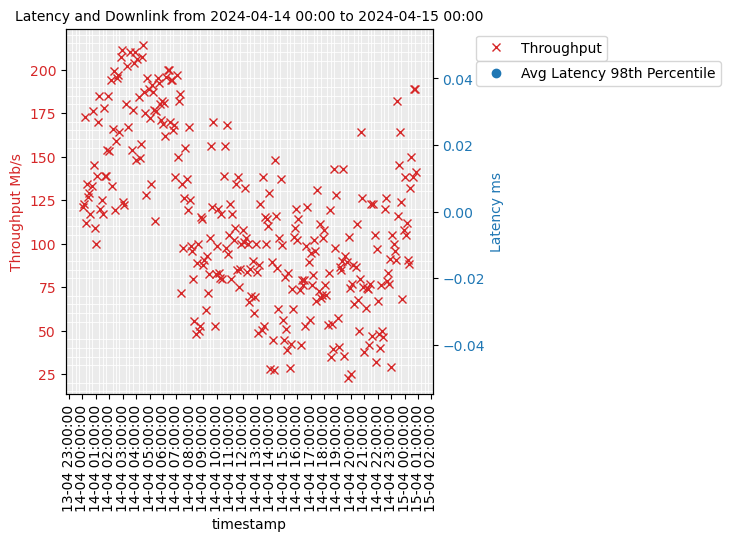

In [3]:
fig, ax1 = plt.subplots()

title_str = f'Latency and Downlink from {dateBegin1_str} to {dateEnd1_str}'
plt.title(title_str, fontsize=10)
ax1.set_facecolor('#EBEBEB')
ax1.grid(which='major', color='white', linewidth=1.2)
ax1.grid(which='minor', color='white', linewidth=0.6)
ax1.minorticks_on()
ax1.xaxis.set_major_locator(mdates.HourLocator(interval=1))



color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Throughput Mb/s', color=color)
bitrate1.plot(ax=ax1,ls='', marker='x', color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.legend(['Throughput'],bbox_to_anchor=(1.1, 1.0), loc='upper left')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Latency ms', color=color)  # we already handled the x-label with ax1
latency99p.plot(ax=ax2,ls='', marker='o', color=color)
ax2.tick_params(axis='y', labelcolor=color)

for label in ax1.get_xticklabels():
    label.set_rotation(90)  # Rotate 90 degrees
    label.set_horizontalalignment('center')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.tick_params(which='minor', bottom=False, left=False)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M:%S'))

plt.legend(['Avg Latency 98th Percentile'],bbox_to_anchor=(1.1, 0.93), loc='upper left')

plt.show()

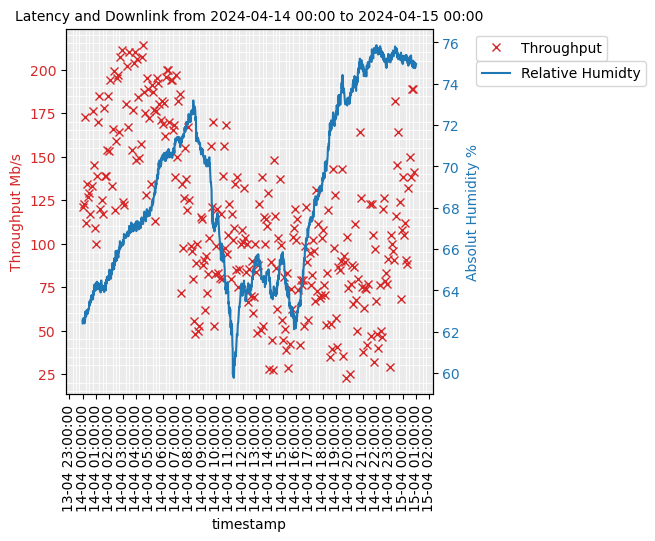

In [4]:
fig, ax1 = plt.subplots()

title_str = f'Latency and Downlink from {dateBegin1_str} to {dateEnd1_str}'
plt.title(title_str, fontsize=10)
ax1.set_facecolor('#EBEBEB')
ax1.grid(which='major', color='white', linewidth=1.2)
ax1.grid(which='minor', color='white', linewidth=0.6)
ax1.minorticks_on()
ax1.xaxis.set_major_locator(mdates.HourLocator(interval=1))



color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Throughput Mb/s', color=color)
bitrate1.plot(ax=ax1,ls='', marker='x', color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.legend(['Throughput'],bbox_to_anchor=(1.1, 1.0), loc='upper left')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Absolut Humidity %', color=color)  # we already handled the x-label with ax1
humidity.plot(ax=ax2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

for label in ax1.get_xticklabels():
    label.set_rotation(90)  # Rotate 90 degrees
    label.set_horizontalalignment('center')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.tick_params(which='minor', bottom=False, left=False)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M:%S'))

plt.legend(['Relative Humidty'],bbox_to_anchor=(1.1, 0.93), loc='upper left')

plt.show()

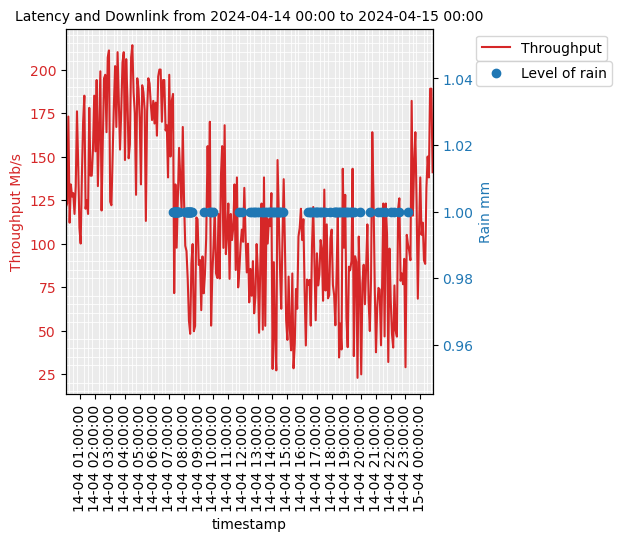

In [7]:
fig, ax1 = plt.subplots()

title_str = f'Latency and Downlink from {dateBegin1_str} to {dateEnd1_str}'
plt.title(title_str, fontsize=10)
ax1.set_facecolor('#EBEBEB')
ax1.grid(which='major', color='white', linewidth=1.2)
ax1.grid(which='minor', color='white', linewidth=0.6)
ax1.minorticks_on()
ax1.xaxis.set_major_locator(mdates.HourLocator(interval=1))



color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.margins(x=0)
ax1.set_ylabel('Throughput Mb/s', color=color)
bitrate1.plot(ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.legend(['Throughput'],bbox_to_anchor=(1.1, 1.0), loc='upper left')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Rain mm', color=color)  # we already handled the x-label with ax1
rain.plot(ax=ax2,ls='',marker='o',color=color)
ax2.tick_params(axis='y',labelcolor=color)

for label in ax1.get_xticklabels():
    label.set_rotation(90)  # Rotate 90 degrees
    label.set_horizontalalignment('center')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.tick_params(which='minor', bottom=False, left=False)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M:%S'))

plt.legend(['Level of rain'],bbox_to_anchor=(1.1, 0.93), loc='upper left')

plt.show()